<a href="https://colab.research.google.com/github/minhaz1172/Neural-Network-with-PyTorch/blob/main/NN_with_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import dataset from kaggle**

# upload kagle.json api in colab

In [15]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"minhaz1172","key":"1bf5ecd4315e11f44401db65ac26d0ea"}'}

#  Move and set permissson

In [16]:
import os
import zipfile

# Make directory and move kaggle.json
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Set proper permissions
!chmod 600 ~/.kaggle/kaggle.json

# install kaggle package

In [17]:
!pip install -q kaggle

# Find and download the dataset

In [18]:
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data

Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
License(s): CC-BY-NC-SA-4.0
  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 47.9MB/s]


# unzip the dataset

In [19]:
# 3. Unzip the file using its actual filename
!unzip breast-cancer-wisconsin-data.zip

Archive:  breast-cancer-wisconsin-data.zip
  inflating: data.csv                


# import necessary liabraries

In [20]:
import numpy as np
import pandas as pd
import torch
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# load the dataset

In [21]:
df=pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# shape of the dataset

In [22]:
df.shape

(569, 33)

# drop useless columns

In [23]:
df.drop(columns=['Unnamed: 32','id'],inplace=True)

In [24]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# train-test-split

In [25]:
X_train,X_test,y_train,y_test=train_test_split(
    df.drop(columns=['diagnosis']), #Feature Selection (X): df.drop(columns=['diagnosis']),This selects all columns from the DataFrame df except for the diagnosis column.
    df['diagnosis'], #Target Selection (y): df['diagnosis'] ,his selects only the diagnosis column to be the target variable.
    test_size=0.2,
    random_state=42)


# scaling

# tandardScaler transforms your data such that it has a mean of 0 and a standard deviation of 1. This is also known as "standardization" or creating a "Z-score".
# The formula it applies to each value x in a feature column is:
# z = (x - μ) / σ


In [26]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train) #.fit(X_train): The scaler "learns" from the training data. It calculates the mean (μ) and standard deviation (σ) for each feature column in X_train and stores these values internally.

X_test=scaler.transform(X_test) #The scaler then uses the μ and σ it just calculated to apply the formula z = (x - μ) / σ to every value in X_train, transforming it.
# .transform(X_test): This step applies the same transformation to the test set. It uses the μ and σ that were learned from the training set (X_train) to scale the test set (X_test).

In [27]:
X_train

array([[-1.44075296, -0.43531947, -1.36208497, ...,  0.9320124 ,
         2.09724217,  1.88645014],
       [ 1.97409619,  1.73302577,  2.09167167, ...,  2.6989469 ,
         1.89116053,  2.49783848],
       [-1.39998202, -1.24962228, -1.34520926, ..., -0.97023893,
         0.59760192,  0.0578942 ],
       ...,
       [ 0.04880192, -0.55500086, -0.06512547, ..., -1.23903365,
        -0.70863864, -1.27145475],
       [-0.03896885,  0.10207345, -0.03137406, ...,  1.05001236,
         0.43432185,  1.21336207],
       [-0.54860557,  0.31327591, -0.60350155, ..., -0.61102866,
        -0.3345212 , -0.84628745]])

In [28]:
y_train

,diagnosis
68,B
181,M
63,B
248,B
60,B
...,...
71,B
106,B
270,B
435,M


# **LabEL encoding**

# LabelEncoder works by assigning a unique integer to each unique class (label) it finds. The process is very straightforward:

# The unique labels are 'B' and 'M'.
#Alphabetically, 'B' comes before 'M'.
# Therefore, LabelEncoder will create the following mapping:'B' -> 0  'M' -> 1

In [29]:
encoder=LabelEncoder()
y_train=encoder.fit_transform(y_train)
y_test=encoder.transform(y_test)

In [30]:
y_train

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,

In [31]:
y_test

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

# convert numpy array to tenor

In [45]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)  # Reshape to column vector
X_test_tensor  = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor  = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [33]:
X_train_tensor

tensor([[-1.4408, -0.4353, -1.3621,  ...,  0.9320,  2.0972,  1.8865],
        [ 1.9741,  1.7330,  2.0917,  ...,  2.6989,  1.8912,  2.4978],
        [-1.4000, -1.2496, -1.3452,  ..., -0.9702,  0.5976,  0.0579],
        ...,
        [ 0.0488, -0.5550, -0.0651,  ..., -1.2390, -0.7086, -1.2715],
        [-0.0390,  0.1021, -0.0314,  ...,  1.0500,  0.4343,  1.2134],
        [-0.5486,  0.3133, -0.6035,  ..., -0.6110, -0.3345, -0.8463]],
       dtype=torch.float64)

In [34]:
y_test_tensor

tensor([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
        0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1])

In [35]:
X_train_tensor.shape

torch.Size([455, 30])

In [36]:
y_train_tensor.shape

torch.Size([455])

In [37]:
y_test_tensor.shape

torch.Size([114])

# Define the model

In [40]:
# define a single neural network  by subclassing PyTorch's nn.Module.

import torch.nn as nn
import torch.optim as optim

class SingleNeuronModel(nn.Module):
  def __init__(self,input_dim):
    super(SingleNeuronModel,self).__init__()
    # Create a linear layer: computes output = x * weight^T + bias. Output dimension is 1.
    self.linear=nn.Linear(input_dim,1)
    # Forward pass: apply linear transformation, then pass through a sigmoid activation.
  # Sigmoid squashes outputs to the [0, 1] range, which is suitable for binary classification.
  def forward(self,x):
    return torch.sigmoid(self.linear(x))

# instantiate the model with the number of input parameters
input_dim=X_train.shape[1] # Get number of features from training data
model=SingleNeuronModel(input_dim)





In [42]:
# define the loss function and optimizer

# use binary crossentropy loss(bce) for binary classification
criterion=nn.BCELoss()

# define the  an optimizer that will update the model parameters.
# Here we use Stochastic Gradient Descent (SGD) with a learning rate of 0.01.
optimizer=optim.SGD(model.parameters(),lr=0.01)


# Training  loop


In [46]:
num_epochs=50
loss_history=[]

# iterate over the dataset multiple time(epochs)
for epoch in range(num_epochs):
  model.train() #Set the model in training mode

  #Forward pass
  y_pred=model(X_train_tensor)
  loss=criterion(y_pred,y_train_tensor) # Calculate binary cross entropy loss between outputs and true labels
  # backward pass and parameter update
  optimizer.zero_grad() # Clear existing gradients from previous backward passes
  loss.backward()  # Backpropagate the error to compute gradients for each parameter

  optimizer.step() # Update model parameters using SGD based on computed gradients
# print the loss of every 10 epoch to monitor training progress
  if (epoch+1)%10==0:
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")
    loss_history.append(loss.item())


Epoch [10/50], Loss: 0.5248
Epoch [20/50], Loss: 0.4463
Epoch [30/50], Loss: 0.3936
Epoch [40/50], Loss: 0.3557
Epoch [50/50], Loss: 0.3270


# Evaluation on test data

In [48]:
model.eval()
with torch.no_grad():  # Disable gradient computation for evaluation since it's unnecessary
  y_pred=model(X_test_tensor)  # Get predictions for the test set
  predicted=y_pred.round()  # Convert probabilities to binary outcomes (0 or 1) using round()
  accuracy=(predicted.eq(y_test_tensor).sum().item()/y_test_tensor.shape[0])
  print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 0.95%


# plot the training loss curve


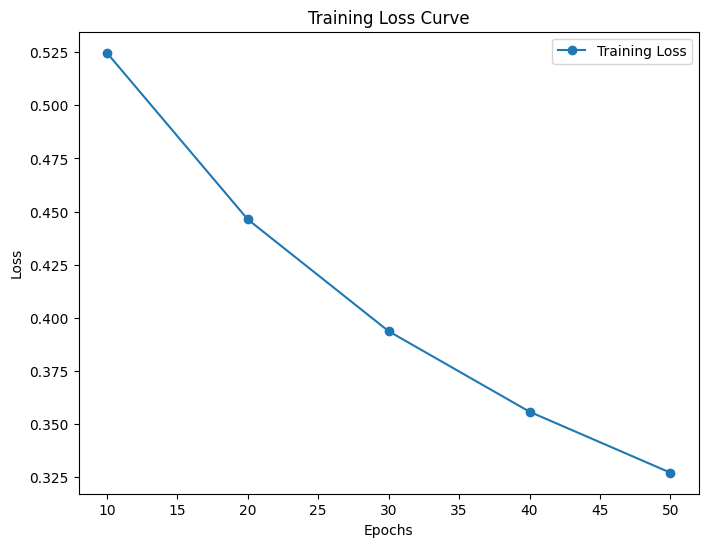

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6)) # create a figure with specific size of
# Create a list of epoch numbers where the loss was recorded
epochs_recorded = [(i + 1) for i in range(num_epochs) if (i + 1) % 10 == 0]
plt.plot(epochs_recorded, loss_history,'-o',label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()